### A Simple Linear Regression for Breast Cancer Detection

### Problem Statement :
Use a __simple linear regression__ for breast cancer detection.

Dataset link : http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29Links 

The input matrix is called P, each row of which corresponds to different measurements of a patient’s tumor cell sample. The corresponding element in the output vector T is -1 if the cell was determined to be benign and +1 otherwise.

__Task 1:__ 

(a) Plot the ROC curve and 

(b) Calculate TPRs at FPR of 5% and 10%, alongside the corresponding thresholds. Use the whole dataset. 

__Task 2 :__

(a) Use the first 2/3 or 66.67% of the data for training and 1/3 or 33.33% of the data for testing.

(b) Plot the ROC curve 

(c) Calculate TPRs at FPR of 5% and 10%, alongside the corresponding thresholds. Use the whole dataset. 

(d) Apply training thresholds to the test data and calculate TPR/FPR pairs for the test subset, use the same decision thresholds obtained for training's 5% and 10% FPRs 

 

### Method : 
* __Dataset Download:__  The dataset is read directly from the UCI Machine Learning repository using pandas.read_csv.
* __Diagnosis Conversion:__ The Diagnosis column is converted to -1 for benign and +1 for malignant.
* __Feature Matrix (P) and Target Vector (T):__ We extract the feature matrix P (all feature columns) and target vector T (the diagnosis values).
* __Print Statements:__ The code prints the few rows of P and T and also displays the dimensions of the data.
* __Note :__ __TPR__ – True Positive Rate and __FPR__ – False Positive Rate

* __Import required libraries__

In [9]:
# Import required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

In [10]:
# Download the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=column_names)
data

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


* __Convert Diagnosis to numeric (-1 for benign, +1 for malignant)__

In [11]:
# Convert Diagnosis to numeric (-1 for benign, +1 for malignant)
data['Diagnosis'] = data['Diagnosis'].apply(lambda x: -1 if x == "B" else 1)
data['Diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568   -1
Name: Diagnosis, Length: 569, dtype: int64

* __Create P matrix ( input matrix or features matrix) and T vector (output vector or target vector)__

In [12]:
# Create P matrix (features) and T vector (target)
P = data.iloc[:, 2:].to_numpy()           # Feature matrix
T = data['Diagnosis'].to_numpy()          # Target vector

# Display the first few rows of P and T
print("First few rows of P (features):")
print(P[:5, :])

print("\nFirst few rows of T (target):")
print(T[:5])

First few rows of P (features):
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.8

In [13]:
# Save dimensions of P and T
n_samples = P.shape[0]
n_features = P.shape[1]

print(f"Number of samples: {n_samples}")
print(f"Number of features: {n_features}")

Number of samples: 569
Number of features: 30


###  Task 1:
* The __ROC curve__ for the entire dataset is computed using the predictions from a __simple linear__ combination of features.
* __Threshold Calculation:__ The code identifies the thresholds corresponding to FPRs of 5% and 10%.

### Task 2:
* The dataset is split into __training__ and __test sets__.
* The __ROC curve__ is computed for __training__ and __test sets__. 
* __Thresholds__ from the training data are applied to the test data to compute the TPR/FPR values at the same decision boundaries.

* Assuming P is the input matrix and T is the output vector 

* Replace with actual data loading

In [33]:
# P = np.load('P.npy')                      # Feature matrix
# T = np.load('T.npy')                      # Target vector (-1 for benign, 1 for malignant)

### Task 1: Calculate ROC curve for the entire dataset
* __Convert -1 to 0 for ROC compatibility__
* __Calculate ROC curve for the entire dataset__
* __Plot ROC curve for the entire dataset__

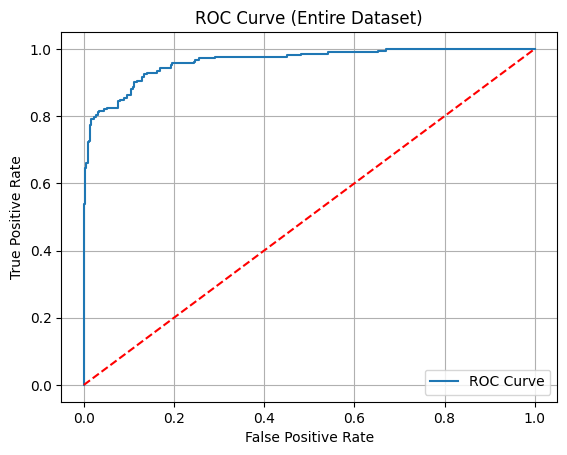

In [14]:
# Convert -1 to 0 for ROC compatibility
T = np.where(T == -1, 0, 1)

# Calculate ROC curve for the entire dataset
predictions = np.dot(P, np.ones(P.shape[1]))

fpr, tpr, thresholds = roc_curve(T, predictions)

# Plot ROC curve for the entire dataset
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")
plt.title("ROC Curve (Entire Dataset)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

* __Calculate TPR / FPR pairs and thresholds at FPR = 5% and 10%__

In [35]:
# Calculate TPR/FPR pairs and thresholds at FPR = 5% and 10%
fpr_5_idx = np.argmin(np.abs(fpr - 0.05))
fpr_10_idx = np.argmin(np.abs(fpr - 0.10))

tpr_5 = tpr[fpr_5_idx]
tpr_10 = tpr[fpr_10_idx]
threshold_5 = thresholds[fpr_5_idx]
threshold_10 = thresholds[fpr_10_idx]

print(f"TPR at 5% FPR: {tpr_5}")
print(f"Threshold at 5% FPR: {threshold_5}")
print(f"TPR at 10% FPR: {tpr_10}")
print(f"Threshold at 10% FPR: {threshold_10}")

TPR at 5% FPR: 0.8207547169811321
Threshold at 5% FPR: 1816.0001100000002
TPR at 10% FPR: 0.8632075471698113
Threshold at 10% FPR: 1744.8418949999998


### Conclusion:
The results indicate the performance of a classification model at two different False Positive Rate (FPR) thresholds (5% and 10%):

#### At 5% FPR:
* The True Positive Rate (TPR) is 0.8207, meaning that 82.07% of the actual positives are correctly identified by the model when allowing a 5% False Positive Rate.
* The decision threshold for achieving this FPR is 1816.0001. This threshold is used to classify the test predictions, and it reflects a higher threshold, meaning the model is stricter in making positive predictions.

#### At 10% FPR:
* The TPR improves to 0.8632, indicating that 86.32% of the actual positives are identified when a higher FPR of 10% is allowed.
* The decision threshold at this FPR is 1744.8418, which is lower than the threshold at 5% FPR. A lower threshold means the model is more lenient in classifying positive instances, allowing a higher true positive rate but at the cost of more false positives.

#### Result:

* Increasing the allowed FPR from 5% to 10% results in an increase in TPR from 82.07% to  86.32%, showing that the model is more sensitive to positive cases at a higher FPR.
* There is a trade-off between the FPR and TPR. A lower threshold (1744.8418) allows more positive cases to be identified but also increases the false positive rate.
* whereas a higher threshold (1816.0001) reduces the false positive rate but at the expense of missing some true positives.

### Task 2: Split data into training and testing sets

### Case - I : Training Data
* __Calculate ROC curve for the training data__
* __Plot ROC curve for the training data__

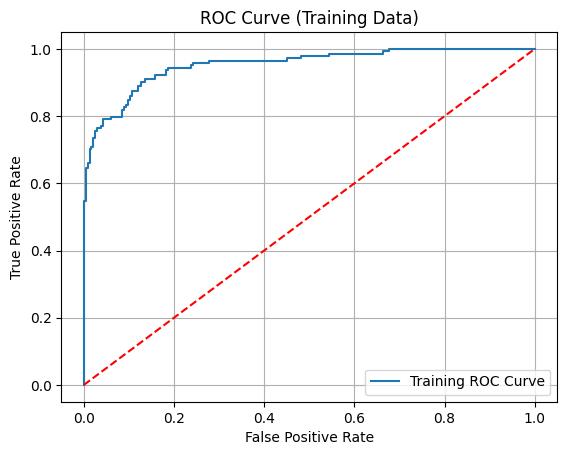

In [15]:
P_train, P_test, T_train, T_test = train_test_split(P, T, test_size=1/3, random_state=42)

# Calculate ROC curve for the training data
train_predictions = np.dot(P_train, np.ones(P_train.shape[1]))
fpr_train, tpr_train, thresholds_train = roc_curve(T_train, train_predictions)

# Plot ROC curve for the training data
plt.plot(fpr_train, tpr_train, label="Training ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")
plt.title("ROC Curve (Training Data)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

* __Calculate TPR/FPR pairs and thresholds for training data at 5% and 10% FPR__

In [37]:
# Calculate TPR/FPR pairs and thresholds for training data at 5% and 10% FPR
fpr_5_train_idx = np.argmin(np.abs(fpr_train - 0.05))
fpr_10_train_idx = np.argmin(np.abs(fpr_train - 0.10))

tpr_5_train = tpr_train[fpr_5_train_idx]
tpr_10_train = tpr_train[fpr_10_train_idx]
threshold_5_train = thresholds_train[fpr_5_train_idx]
threshold_10_train = thresholds_train[fpr_10_train_idx]

print(f"Training: TPR at 5% FPR: {tpr_5_train}")
print(f"Training: Threshold at 5% FPR: {threshold_5_train}")
print(f"Training: TPR at 10% FPR: {tpr_10_train}")
print(f"Training: Threshold at 10% FPR: {threshold_10_train}")

Training: TPR at 5% FPR: 0.7708333333333334
Training: Threshold at 5% FPR: 1888.357024
Training: TPR at 10% FPR: 0.8472222222222222
Training: Threshold at 10% FPR: 1754.64049


### Conclusion: Training set
The results represent the performance of a classification model on the training set at two different False Positive Rate (FPR) thresholds (5% and 10%):

#### At 5% FPR (Training Set):
* The True Positive Rate (TPR) is 0.7708, meaning that 77.08% of the actual positives are correctly identified by the model when allowing a 5% False Positive Rate.
* The decision threshold to achieve this FPR is 1888.3670, indicating that the model uses a relatively high threshold for making positive predictions. This reflects a more conservative classification approach, resulting in fewer false positives but also a lower TPR.

#### At 10% FPR (Training Set):
* The TPR increases to 0.8472, meaning that 84.72% of the actual positives are identified when the FPR is increased to 10%.
* The decision threshold corresponding to this FPR is 1754.6404, which is lower than the threshold at 5% FPR. This lower threshold allows the model to capture more true positives, though it also results in more false positives.


#### Result : 
* As the allowed FPR increases from 5% to 10%, the TPR improves from 77.08% to 84.72%, demonstrating that the model becomes more sensitive and identifies more true positives when it is allowed to make more false positive errors.
* The trade-off between FPR and TPR is evident: a higher threshold (1888.3670) reduces false positives but misses more true positives, while a lower threshold (1754.6404) captures more true positives but at the expense of more false positives.
* The model shows a reasonable increase in TPR with a small increase in FPR, suggesting that the model has room to improve sensitivity with a manageable trade-off in false positives.

### Case - II : Testing Data
*  __Calculate ROC curve for the testing data__
* __Plot ROC curve for the testing data__

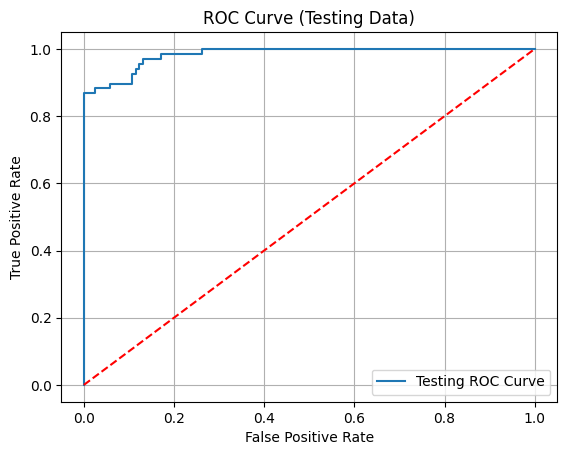

In [16]:
# Calculate ROC curve for the testing data
test_predictions = np.dot(P_test, np.ones(P_test.shape[1]))
fpr_test, tpr_test, thresholds_test = roc_curve(T_test, test_predictions)

# Plot ROC curve for the testing data
plt.plot(fpr_test, tpr_test, label="Testing ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")
plt.title("ROC Curve (Testing Data)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

* __Apply training thresholds to the test data and calculate TPR/FPR pairs__

$TPR= TP/(TP+FN)$

$FPR= FP/(TN+FP)$

In [39]:
# Apply training thresholds to the test data and calculate TPR/FPR pairs
test_predictions_5 = test_predictions >= threshold_5_train
test_predictions_10 = test_predictions >= threshold_10_train

tpr_5_test = np.sum((test_predictions_5 == 1) & (T_test == 1)) / np.sum(T_test == 1)
fpr_5_test = np.sum((test_predictions_5 == 1) & (T_test == 0)) / np.sum(T_test == 0)

tpr_10_test = np.sum((test_predictions_10 == 1) & (T_test == 1)) / np.sum(T_test == 1)
fpr_10_test = np.sum((test_predictions_10 == 1) & (T_test == 0)) / np.sum(T_test == 0)

print(f"Testing: TPR at 5% FPR threshold: {tpr_5_test}")
print(f"Testing: FPR at 5% FPR threshold: {fpr_5_test}")
print(f"Testing: TPR at 10% FPR threshold: {tpr_10_test}")
print(f"Testing: FPR at 10% FPR threshold: {fpr_10_test}")

Testing: TPR at 5% FPR threshold: 0.8676470588235294
Testing: FPR at 5% FPR threshold: 0.00819672131147541
Testing: TPR at 10% FPR threshold: 0.8970588235294118
Testing: FPR at 10% FPR threshold: 0.09016393442622951


### Conclusion: Testing Set
The results reflect the performance of a classification model on the test set at two different False Positive Rate (FPR) thresholds (5% and 10%). Here’s a breakdown of the findings:

#### At the 5% FPR Threshold (Testing Set):
* The True Positive Rate (TPR) is 0.8676, meaning that 86.76% of the actual positive cases are correctly identified by the model when aiming for a False Positive Rate around 5%.
* However, the actual observed FPR is much lower, at (0.00819) or 0.82%. This indicates that the model is even more conservative than the 5% target, producing fewer false positives than anticipated, while still maintaining a high TPR.

#### At the 10% FPR Threshold (Testing Set):
* The TPR increases to 0.8971, meaning the model correctly identifies 89.71% of positive cases when the FPR threshold is set at 10%.
* The actual observed FPR at this threshold is (0.09016) or 9.02%, closely matching the 10% target. This shows that the model becomes more lenient in making positive predictions, resulting in a slightly higher TPR but also a higher number of false positives.

#### Result :
* At the 5% FPR threshold, the model has a high TPR of 86.8% with an actual FPR of only 0.82%, meaning it performs better than expected in terms of limiting false positives while still correctly identifying a large proportion of positives.
* At the 10% FPR threshold, the TPR improves to 89.7%, showing that the model becomes more sensitive to positive cases, though this comes at the cost of a higher FPR (9.02%).


* The trade-off between sensitivity (TPR) and false positives (FPR) is apparent: increasing the FPR threshold from 5% to 10% raises the TPR by about 3 percentage points, but also significantly increases the false positive rate.


### Final  Conclusion:
Overall, the model performs well in terms of balancing TPR and FPR, with strong detection of positives at both thresholds and better-than-expected false positive control at the 5% FPR threshold.